# Least Squares

## Linear Case

\$ \\{(x_i, y_i)\\}_i^N \$ points

Square of the distance between \$ y_i \$ and \$ m x_i + q \$:


\$
    F = \sum_i \big(y_i - (m x_i + q) \big)^2
\$

Quantities used later:

\$
  X = \sum_i x_i       \newline
  X^2 = \sum_i x^2_i   \newline
  Y = \sum_i y_i       \newline
  XY = \sum_i x_i y_i
\$

### Derivatives

\$
\begin{array}{}
    \partial_m F & = & 2 \cdot \sum_i \big(y_i - (m x_i + q) \big)\cdot x_i                         \newline
                 & = & 2 \cdot \sum_i \big( (y_i \cdot x_i) - (m x_i\cdot x_i) - (q\cdot x_i) \big) \newline
                 & = & 2 \cdot ( XY - m X^2 - q X)                                                  \newline
    \partial_q F & = & - 2 \cdot \sum_i \big(y_i - (m x_i + q) \big)                                \newline
                 & = & - 2 \cdot \sum_i \big(y_i -  m x_i - q \big)                                 \newline
                 & = & - 2 \cdot ( Y - m X - q N)                                                   \newline
\end{array}
\$

Set derivative to zero:

\$ \nabla F = 0 \$

\$
\left\\{
\begin{array}
    XY - m X^2 - q X & = & 0 \newline
     Y - m X - q N & = & 0
\end{array}
\right.
\$

\$
\left\\{
\begin{array}
    q N + m X     & = & Y  \newline
    q X + m X^2   & = & XY 
\end{array}
\right.
\$

Using vandermonde matrix
\$
V_n = 
\left(
\begin{matrix}
    1 & x_0    & \ldots & x_0^n  \newline
    1 & \ldots & \ldots & \ldots \newline
    1 & x_m    & \ldots & x_m^n
\end{matrix}
\right)
\$

the previous systems reduces to:
\$
V_1^t \cdot V_1 \cdot x = V_1^t \cdot y
\$


\$
x = (V_1^t \cdot V_1)^{-1} \cdot V_1^t \cdot y
\$

Previous formula generalises to higher order case

\$
x = (V_n^t \cdot V_n)^{-1} \cdot V_n^t \cdot y
\$

## Numerical tests

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
# number of points to generate
nPoints = 1000
# order of the interpolating function
order = 10 # < 11

In [3]:
a = np.random.random(order + 1)

# generate x and y
x = np.linspace(0, 1, nPoints)
y = a * np.array([x] * (order + 1)).T**range(order + 1) 
y = np.sum(y, axis=1) + np.random.random(len(x))

In [4]:
# Vandermonde matrix:
V = np.array([x] * (order + 1)).T**range(order + 1)
Vt = V.transpose()

# compute coeff
c = np.dot(np.dot(np.linalg.inv(np.dot(Vt, V)), Vt), y)

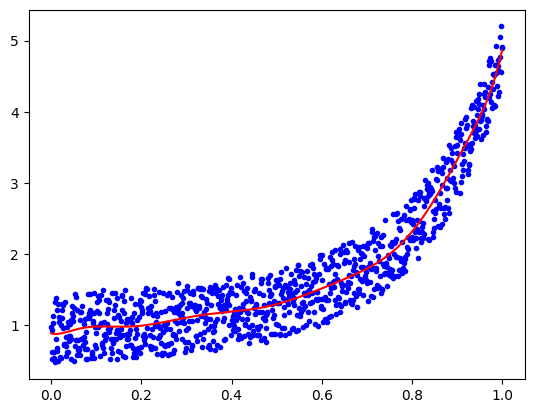

In [5]:
plt.figure()

plt.plot(x, y, 'b.')

yNew = np.sum(c * np.array([x] * (order + 1)).T**range(order + 1), axis=1)
plt.plot(x, yNew, 'r-')

plt.show()